In [7]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('./deeplearning.mplstyle')


In [8]:
#datset
x_train = np.array([[0.5, 1.5],
                   [1, 1],
                   [1.5, 0.5],
                   [3, 0.5],
                   [2, 2],
                   [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

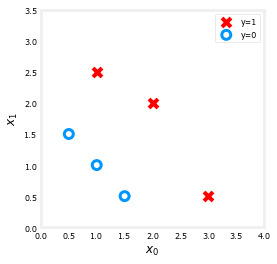

In [10]:
fig, ax = plt.subplots(1,1,figsize = (4,4))
plot_data(x_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()


## Logistic Gradient Descent

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$  

In [25]:
#we will use this function to get dj/dw and dj/db values so that we can use them
def compute_gradient_logistic(x, y, w, b):
    #to find length of x
    m, n= x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        z_i = np.dot(x[i], w) + b
        f_wb_i = sigmoid(z_i)
        err_i  = f_wb_i  - y[i]  
        #now finding dj/dw and dj/db for every feature
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  
        

In [26]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


## Computing Gradient Descent

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [35]:
def gradient_descent(x, y, w_initial, b_initial, alpha, num_iters):
       # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_initial)  #avoid modifying global w within function
    b = b_initial
    for i in range(num_iters):
        #firstly we need dej / dw and dj / db
        dj_db, dj_dw = compute_gradient_logistic(x, y, w_initial, b_initial)
        
        #now update parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(x, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing
        

In [36]:
#making some initial values
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   


C:\Users\Usman Yaqoob\Machine Learning Projects\Logistic Regression\lab_utils_common.py:77: RuntimeWarning: divide by zero encountered in log
  cost  += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)       # scalar
C:\Users\Usman Yaqoob\Machine Learning Projects\Logistic Regression\lab_utils_common.py:77: RuntimeWarning: invalid value encountered in multiply
  cost  += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)       # scalar


Iteration 1000: Cost nan   
Iteration 2000: Cost nan   
Iteration 3000: Cost nan   
Iteration 4000: Cost nan   
Iteration 5000: Cost nan   
Iteration 6000: Cost nan   
Iteration 7000: Cost nan   
Iteration 8000: Cost nan   
Iteration 9000: Cost nan   

updated parameters: w:[250.   166.67], b:0.0
